In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib
from matplotlib import patheffects

import seaborn as sns

_30k_main = {
    "blue": "#202F66",
    "orange": "#FF7048",
    "purple": "#8B87EA",
    "pink": "#D869AB",
    "cyan": "#54C9B9",
    "yellow": "#F3D36E",
}

_30k_danger_safe = {
    "danger": "#FF4F72",
    "safe": "#58EDB9",
}

_30k_text = {
    "text_black": "#32363A",
    "text_lighter1": "#6F7273",
    "text_lighter2": "#8B8E8F",
    "grey1": "#aeb7bc",
    "grey2": "#c3cace",
    "grey3": "#d9dde0",
    "bg_cream": "#FAF7F4"
}

_font_mono = "Inconsolata"
_font_serif = "Canela Text"
_font_sans = "Gill Sans"

plt.style.use("./utils/-30k.mplstyle")

_30k = list(_30k_main.values())
sns.set_palette(_30k)

# ← → ↓ ↑


def _30k_path_effects(linewidth=2.5, foreground=_30k_text['bg_cream'], alpha=1.0, **kwargs):
    return [patheffects.withStroke(linewidth=linewidth, foreground=foreground, alpha=alpha, **kwargs)]

import warnings

warnings.filterwarnings('ignore')

In [2]:
from utils.puzzle import *

# What P1 knows

In [3]:
n = 6

board, key, key_pos = generate_board(n)

print(f"""
board size: {2**n}, {board.shape}
the key is at the postition: {key_pos}, {to_binary_string(n, key_pos)}
""")


board size: 64, (8, 8)
the key is at the postition: 52, 110100



# Generate Thing to visualise

In [4]:
ht_cmap = [_30k_text['grey3'], _30k_main['blue']]
mask_cmap = [_30k_text['bg_cream'], _30k_main['orange']]
mask_alpha = 0.3

In [5]:
# board position, for annotation
postion_arr = np.reshape(np.arange(2**n), board.shape)

In [6]:
# key masking overlay
key_mask = np.where(key==0, np.nan, 1)

In [7]:
# position in base 2
bin_position_arr = np.array(generate_binary_position_array(n))

In [8]:
bin_masking_arr = generate_pairity_masking(n)

for key in bin_masking_arr.keys():
    bin_masking_arr[key] = np.reshape(bin_masking_arr[key], board.shape)

In [9]:
# The warden randomly set this board game

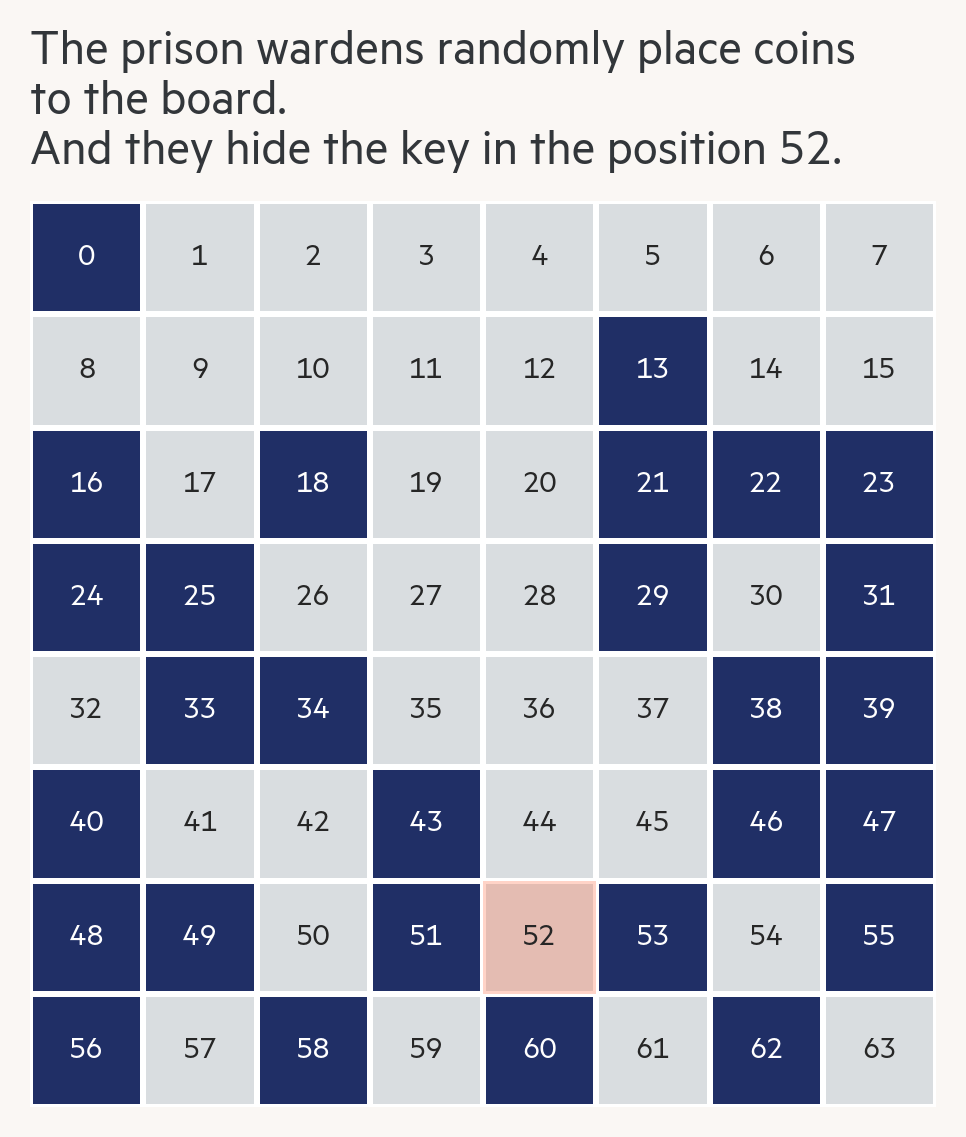

In [10]:
# dynamic fontsize based on the shape of board
# we have to config things based on height
h = n//1.5
fs = np.clip(h/(n*6)*72, a_min=4, a_max=12)
lw = np.clip(8/n, a_min=0.75, a_max=2)

fig = plt.figure(figsize=(h, h))

sns.heatmap(board, linewidths=lw, 
            annot=postion_arr, annot_kws={'fontsize': fs}, fmt="d",
            vmin=0, vmax=1, cmap=ht_cmap, square=True, cbar=False)

sns.heatmap(key_mask, alpha=mask_alpha, 
            cmap=mask_cmap, cbar=False, vmin=0, vmax=1)

plt.title(f"The prison wardens randomly place coins\nto the board.\nAnd they hide the key in the position {key_pos}.", fontsize=fs*1.25**2)

ax = plt.gca()

plt.xticks([], [])
plt.yticks([], [])

plt.show()

# P1 Play the game

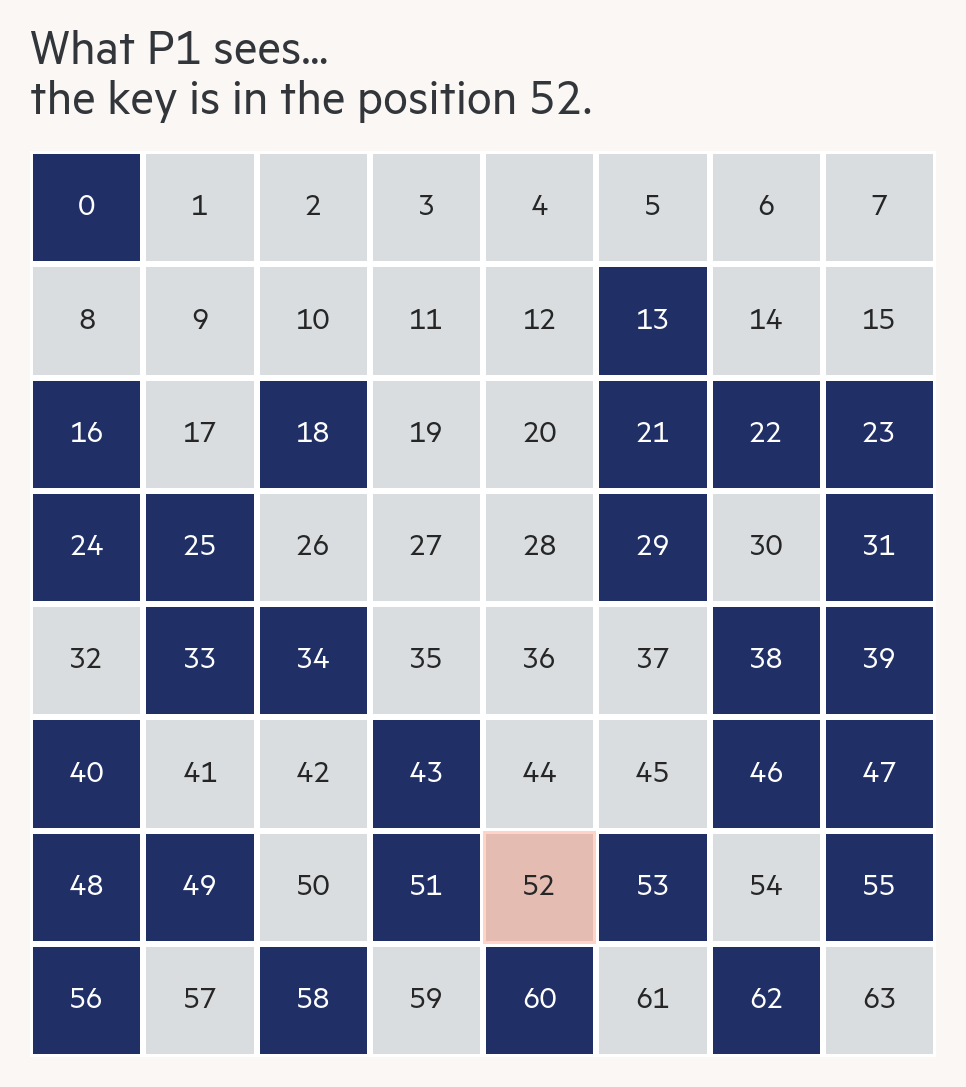

In [11]:
# dynamic fontsize based on the shape of board
# we have to config things based on height
h = n//1.5
fs = np.clip(h/(n*6)*72, a_min=4, a_max=12)
lw = np.clip(8/n, a_min=0.75, a_max=2)

fig = plt.figure(figsize=(h, h))

sns.heatmap(board, linewidths=lw, 
            annot=postion_arr, annot_kws={'fontsize': fs}, fmt="d",
            vmin=0, vmax=1, cmap=ht_cmap, square=True, cbar=False)

sns.heatmap(key_mask, alpha=mask_alpha, 
            cmap=mask_cmap, cbar=False, vmin=0, vmax=1)

plt.title(f"What P1 sees...\nthe key is in the position {key_pos}.", fontsize=fs*1.25**2)

ax = plt.gca()

plt.xticks([], [])
plt.yticks([], [])

plt.show()

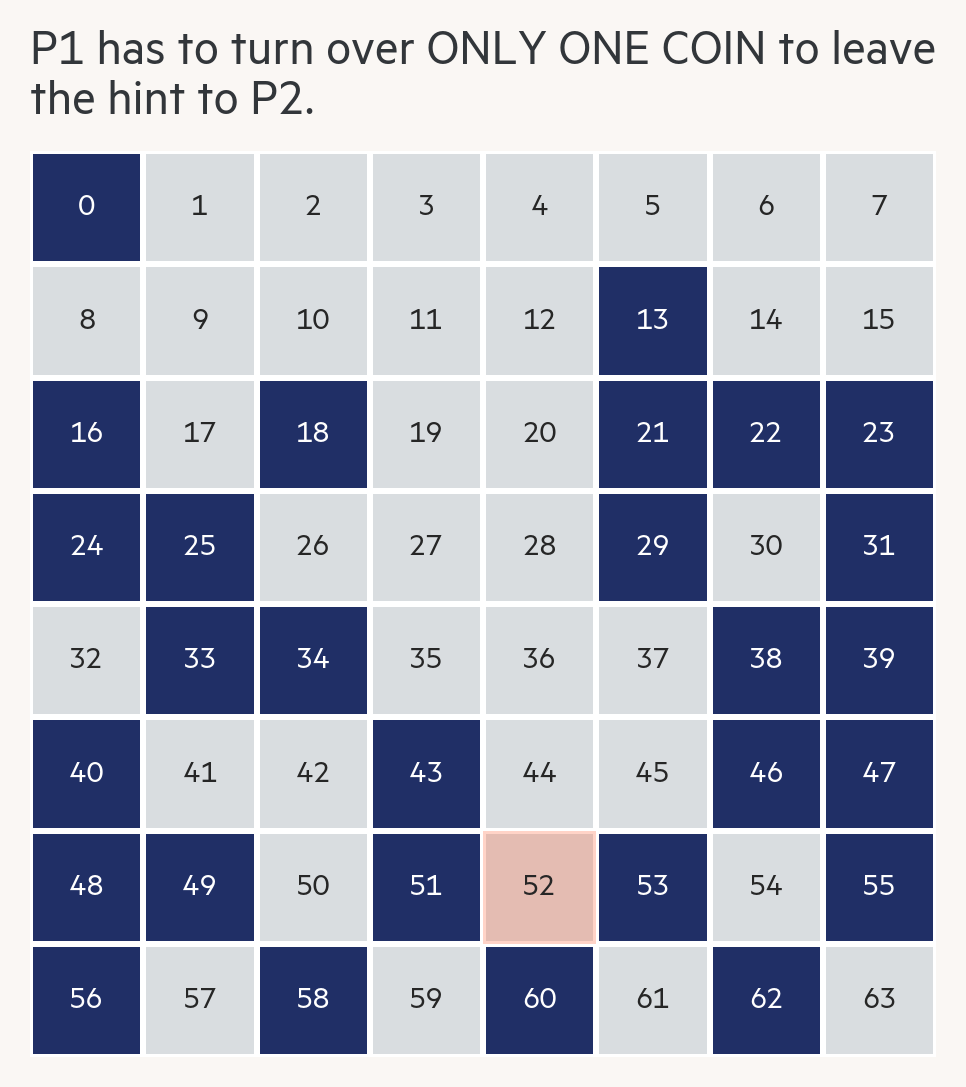

In [12]:
# dynamic fontsize based on the shape of board
# we have to config things based on height
h = n//1.5
fs = np.clip(h/(n*6)*72, a_min=4, a_max=12)
lw = np.clip(8/n, a_min=0.75, a_max=2)

fig = plt.figure(figsize=(h, h))

sns.heatmap(board, linewidths=lw, 
            annot=postion_arr, annot_kws={'fontsize': fs}, fmt="d",
            vmin=0, vmax=1, cmap=ht_cmap, square=True, cbar=False)

sns.heatmap(key_mask, alpha=mask_alpha, 
            cmap=mask_cmap, cbar=False, vmin=0, vmax=1)

plt.title(f"P1 has to turn over ONLY ONE COIN to leave\nthe hint to P2.", fontsize=fs*1.25**2)

ax = plt.gca()

plt.xticks([], [])
plt.yticks([], [])

plt.show()

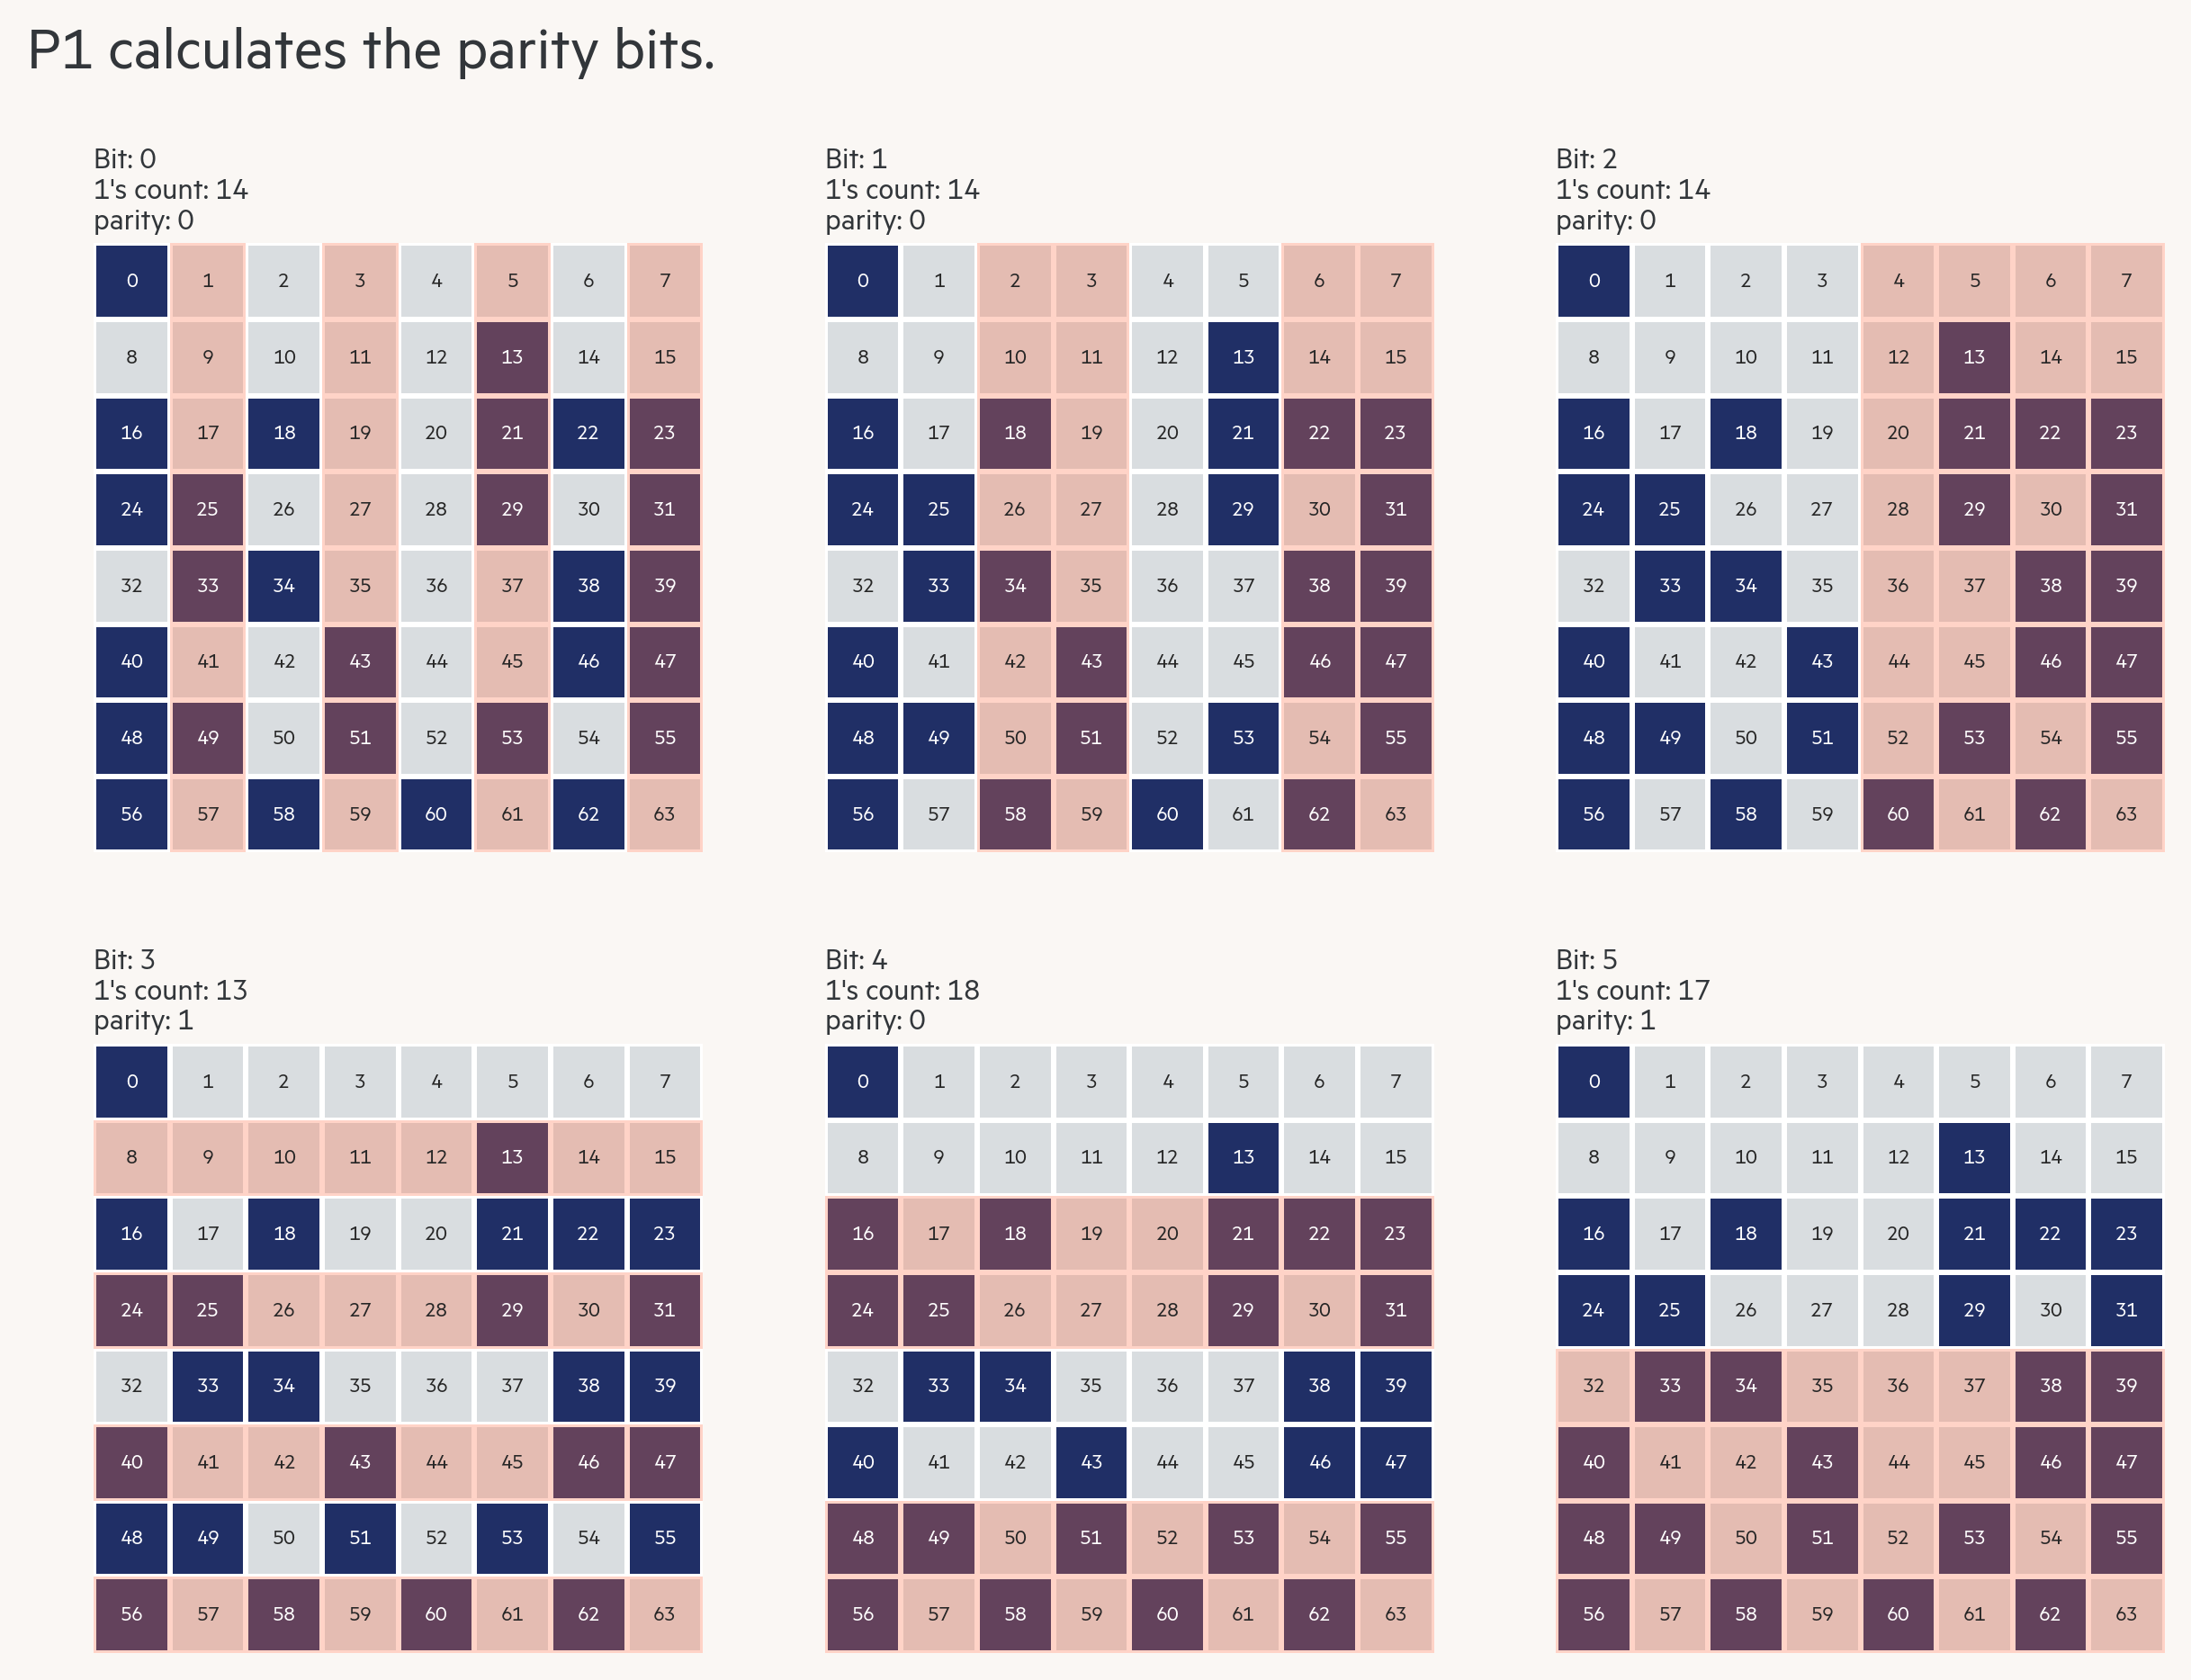

In [13]:
parity_bits = ""

ncols = n//2
nrows = int(np.ceil(n/ncols))

# dynamic fontsize based on the shape of board
# we have to config things based on height
h = n//2
fs = np.clip(h/(n*6)*72, a_min=4, a_max=12)
lw = np.clip(8/n, a_min=0.75, a_max=2)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(1.1*h*ncols, 1.2*h*nrows))
axs = np.reshape(axs, (nrows*ncols))

for i, ax in enumerate(axs):
    
    if i in bin_masking_arr.keys():
        sns.heatmap(board, linewidths=lw, 
                    annot=postion_arr, annot_kws={'fontsize': fs}, fmt="d",
                    vmin=0, vmax=1, cmap=ht_cmap, square=True, cbar=False, ax=axs[i])

        sns.heatmap(bin_masking_arr[i], alpha=mask_alpha, 
                    cmap=mask_cmap, cbar=False, vmin=0, vmax=1, ax=axs[i])
    
        count_head = int(np.nansum(bin_masking_arr[i] * board))
        parity = count_head % 2
        axs[i].set_title(f"Bit: {i}\n1's count: {count_head}\nparity: {parity}", fontsize=fs*(1.414**1), pad=4)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        parity_bits += str(parity)
    else:
        axs[i].set_visible(False)

        
plt.suptitle(x=0.10, y=0.95, t="P1 calculates the parity bits.", fontsize=fs*(1.414**3), ha='left', va='bottom')

plt.show()

parity_bits = parity_bits[::-1]

In [14]:
print(f"Now, P1 has encoded the parity bits: {parity_bits} - {int(parity_bits, base=2)}")
print(f"But P1 needs to encode the key position: {to_binary_string(n, key_pos)} - {key_pos}")

pos_to_flip = int(parity_bits, base=2) ^ key_pos # XOR

print(f"""
{parity_bits} - {int(parity_bits, base=2)} (the current board parity)
{to_binary_string(n, key_pos)} - {key_pos} (the key position)
{to_binary_string(n, pos_to_flip)} - {pos_to_flip} (need to flip this position)
""")

Now, P1 has encoded the parity bits: 101000 - 40
But P1 needs to encode the key position: 110100 - 52

101000 - 40 (the current board parity)
110100 - 52 (the key position)
011100 - 28 (need to flip this position)



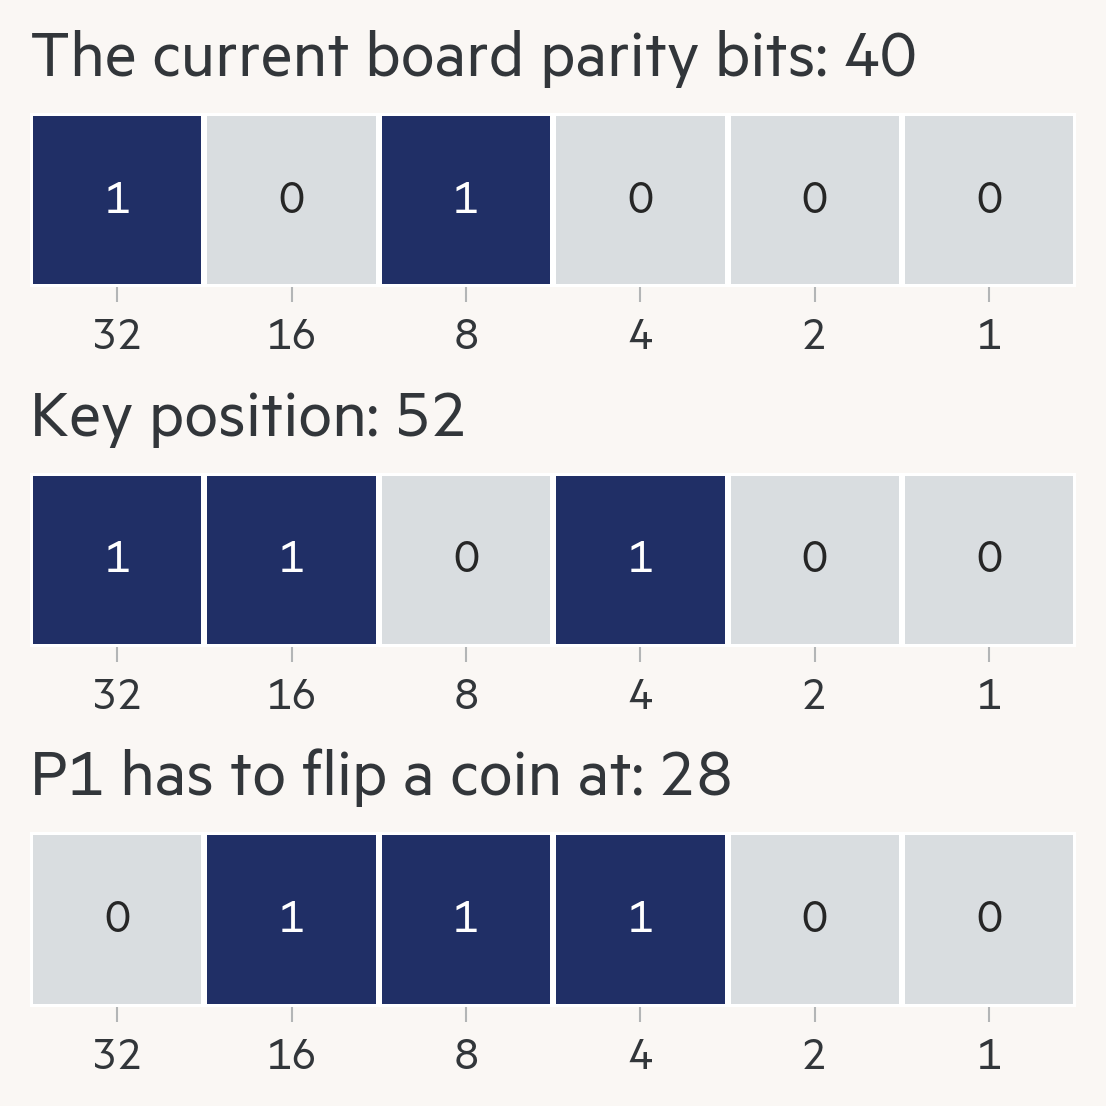

In [15]:
# dynamic fontsize based on the shape of board
# we have to config things based on height
h = np.clip(n//2, 2, 3)
fs = np.clip(h/(n*2)*72, a_min=4, a_max=12)
lw = np.clip(8/n, a_min=0.75, a_max=2)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(1.5*h, 1.5*h))
axs = np.reshape(axs, (3,))


parity_heatmap = np.array([list(parity_bits)], dtype=np.int)
sns.heatmap(parity_heatmap, linewidths=lw, annot_kws={'fontsize': fs},
            annot=parity_heatmap, fmt="d",
            vmin=0, vmax=1, cmap=ht_cmap, square=True, cbar=False, ax=axs[0])
axs[0].set_yticks([])
axs[0].set_xticklabels(2**np.arange(0, n)[::-1])
axs[0].set_title(f"The current board parity bits: {int(parity_bits, base=2)}", fontsize=fs*(1.414))

key_pos_heatmap = np.array([list(to_binary_string(n, key_pos))], dtype=np.int)
sns.heatmap(key_pos_heatmap, linewidths=lw, annot_kws={'fontsize': fs},
            annot=key_pos_heatmap, fmt="d",
            vmin=0, vmax=1, cmap=ht_cmap, square=True, cbar=False, ax=axs[1])
axs[1].set_yticks([])
axs[1].set_title(f"Key position: {key_pos}", fontsize=fs*(1.414))
axs[1].set_xticklabels(2**np.arange(0, n)[::-1])
pos_to_flip_heatmap = np.array([list(to_binary_string(n, pos_to_flip))], dtype=np.int)
sns.heatmap(pos_to_flip_heatmap, linewidths=lw, annot_kws={'fontsize': fs},
            annot=pos_to_flip_heatmap, fmt="d",
            vmin=0, vmax=1, cmap=ht_cmap, square=True, cbar=False, ax=axs[2])
axs[2].set_yticks([])
axs[2].set_title(f"P1 has to flip a coin at: {pos_to_flip}", fontsize=fs*(1.414))
axs[2].set_xticklabels(2**np.arange(0, n)[::-1])

plt.show()

# P1 flip the coin

In [16]:
r, c = np.where(postion_arr==pos_to_flip)
r, c = r[0], c[0]

In [17]:
board_flip = board.copy()
board_flip[r, c] = int(not(board_flip[r, c]))

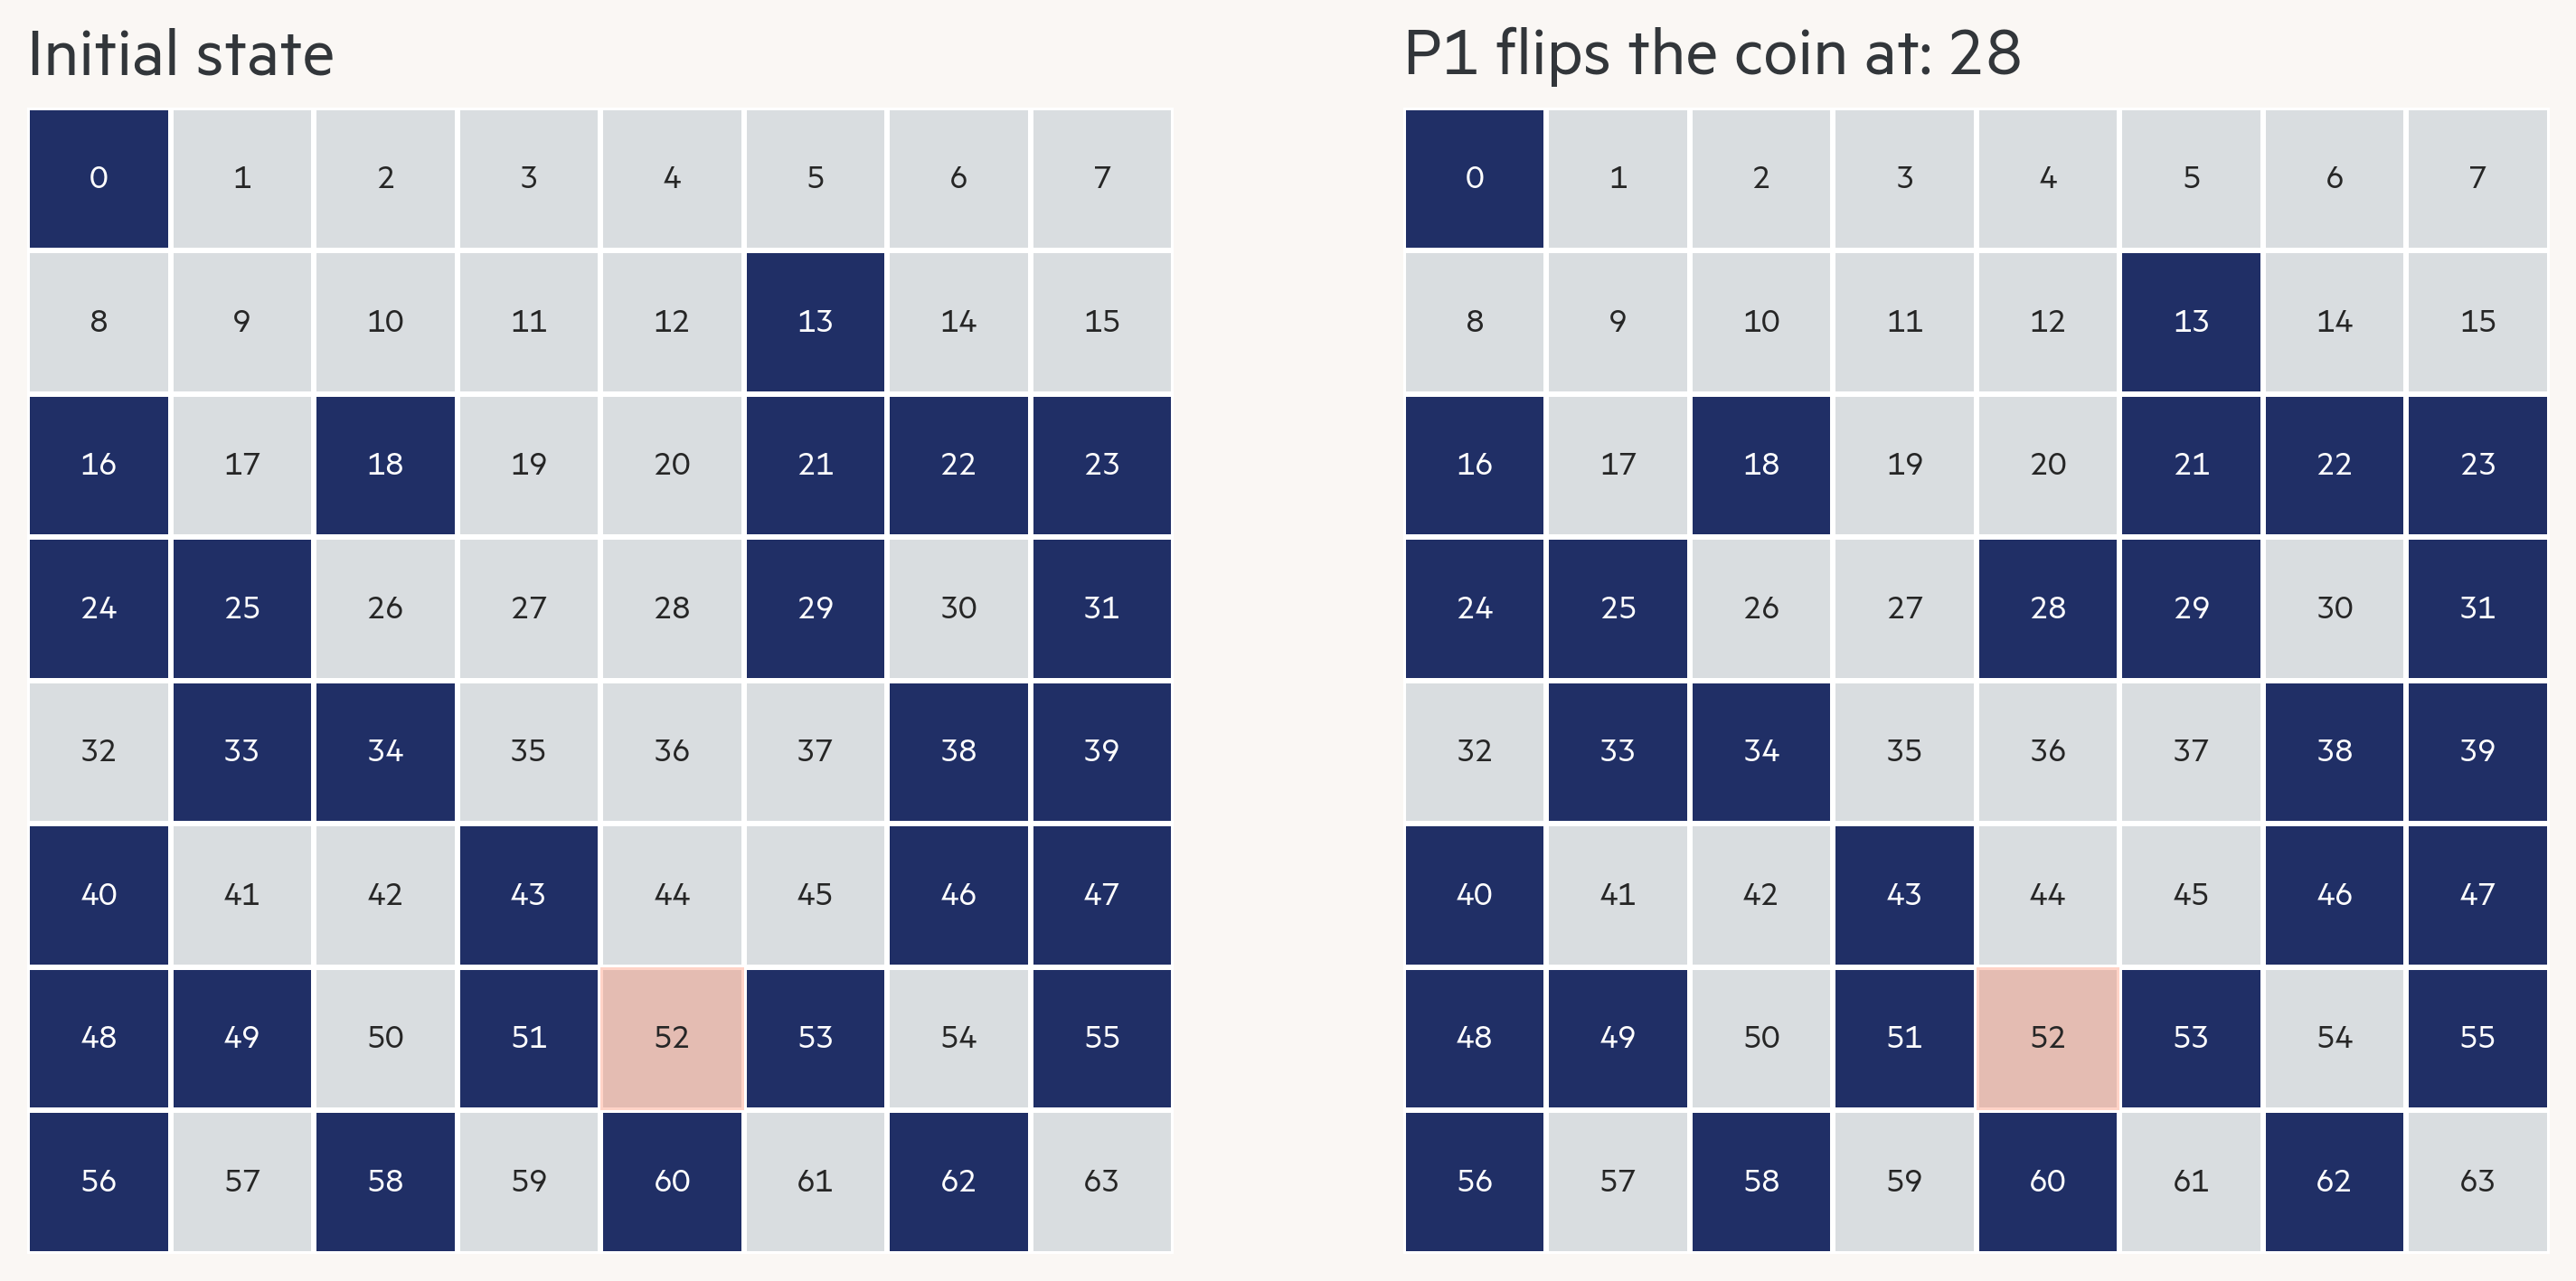

In [18]:
# dynamic fontsize based on the shape of board
# we have to config things based on height
h = n//1.5
fs = np.clip(h/(n*5)*72, a_min=8, a_max=12)
lw = np.clip(8/n, a_min=0.75, a_max=2)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(3*h, 2*h))

sns.heatmap(board, linewidths=lw, annot_kws={'fontsize': fs},
            annot=postion_arr, fmt="d",
            vmin=0, vmax=1, cmap=ht_cmap, square=True, cbar=False, ax=axs[0])

sns.heatmap(key_mask, alpha=mask_alpha, 
            cmap=mask_cmap, cbar=False, vmin=0, vmax=1, ax=axs[0])

sns.heatmap(board_flip, linewidths=lw, annot_kws={'fontsize': fs},
            annot=postion_arr, fmt="d",
            vmin=0, vmax=1, cmap=ht_cmap, square=True, cbar=False, ax=axs[1])

sns.heatmap(key_mask, alpha=mask_alpha, 
            cmap=mask_cmap, cbar=False, vmin=0, vmax=1, ax=axs[1])

axs[0].set_title(f"Initial state", fontsize=fs*(1.414**2))
axs[1].set_title(f"P1 flips the coin at: {pos_to_flip}", fontsize=fs*(1.414**2))

axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].set_xticks([])
axs[1].set_yticks([])

plt.show()

# P2 play the game

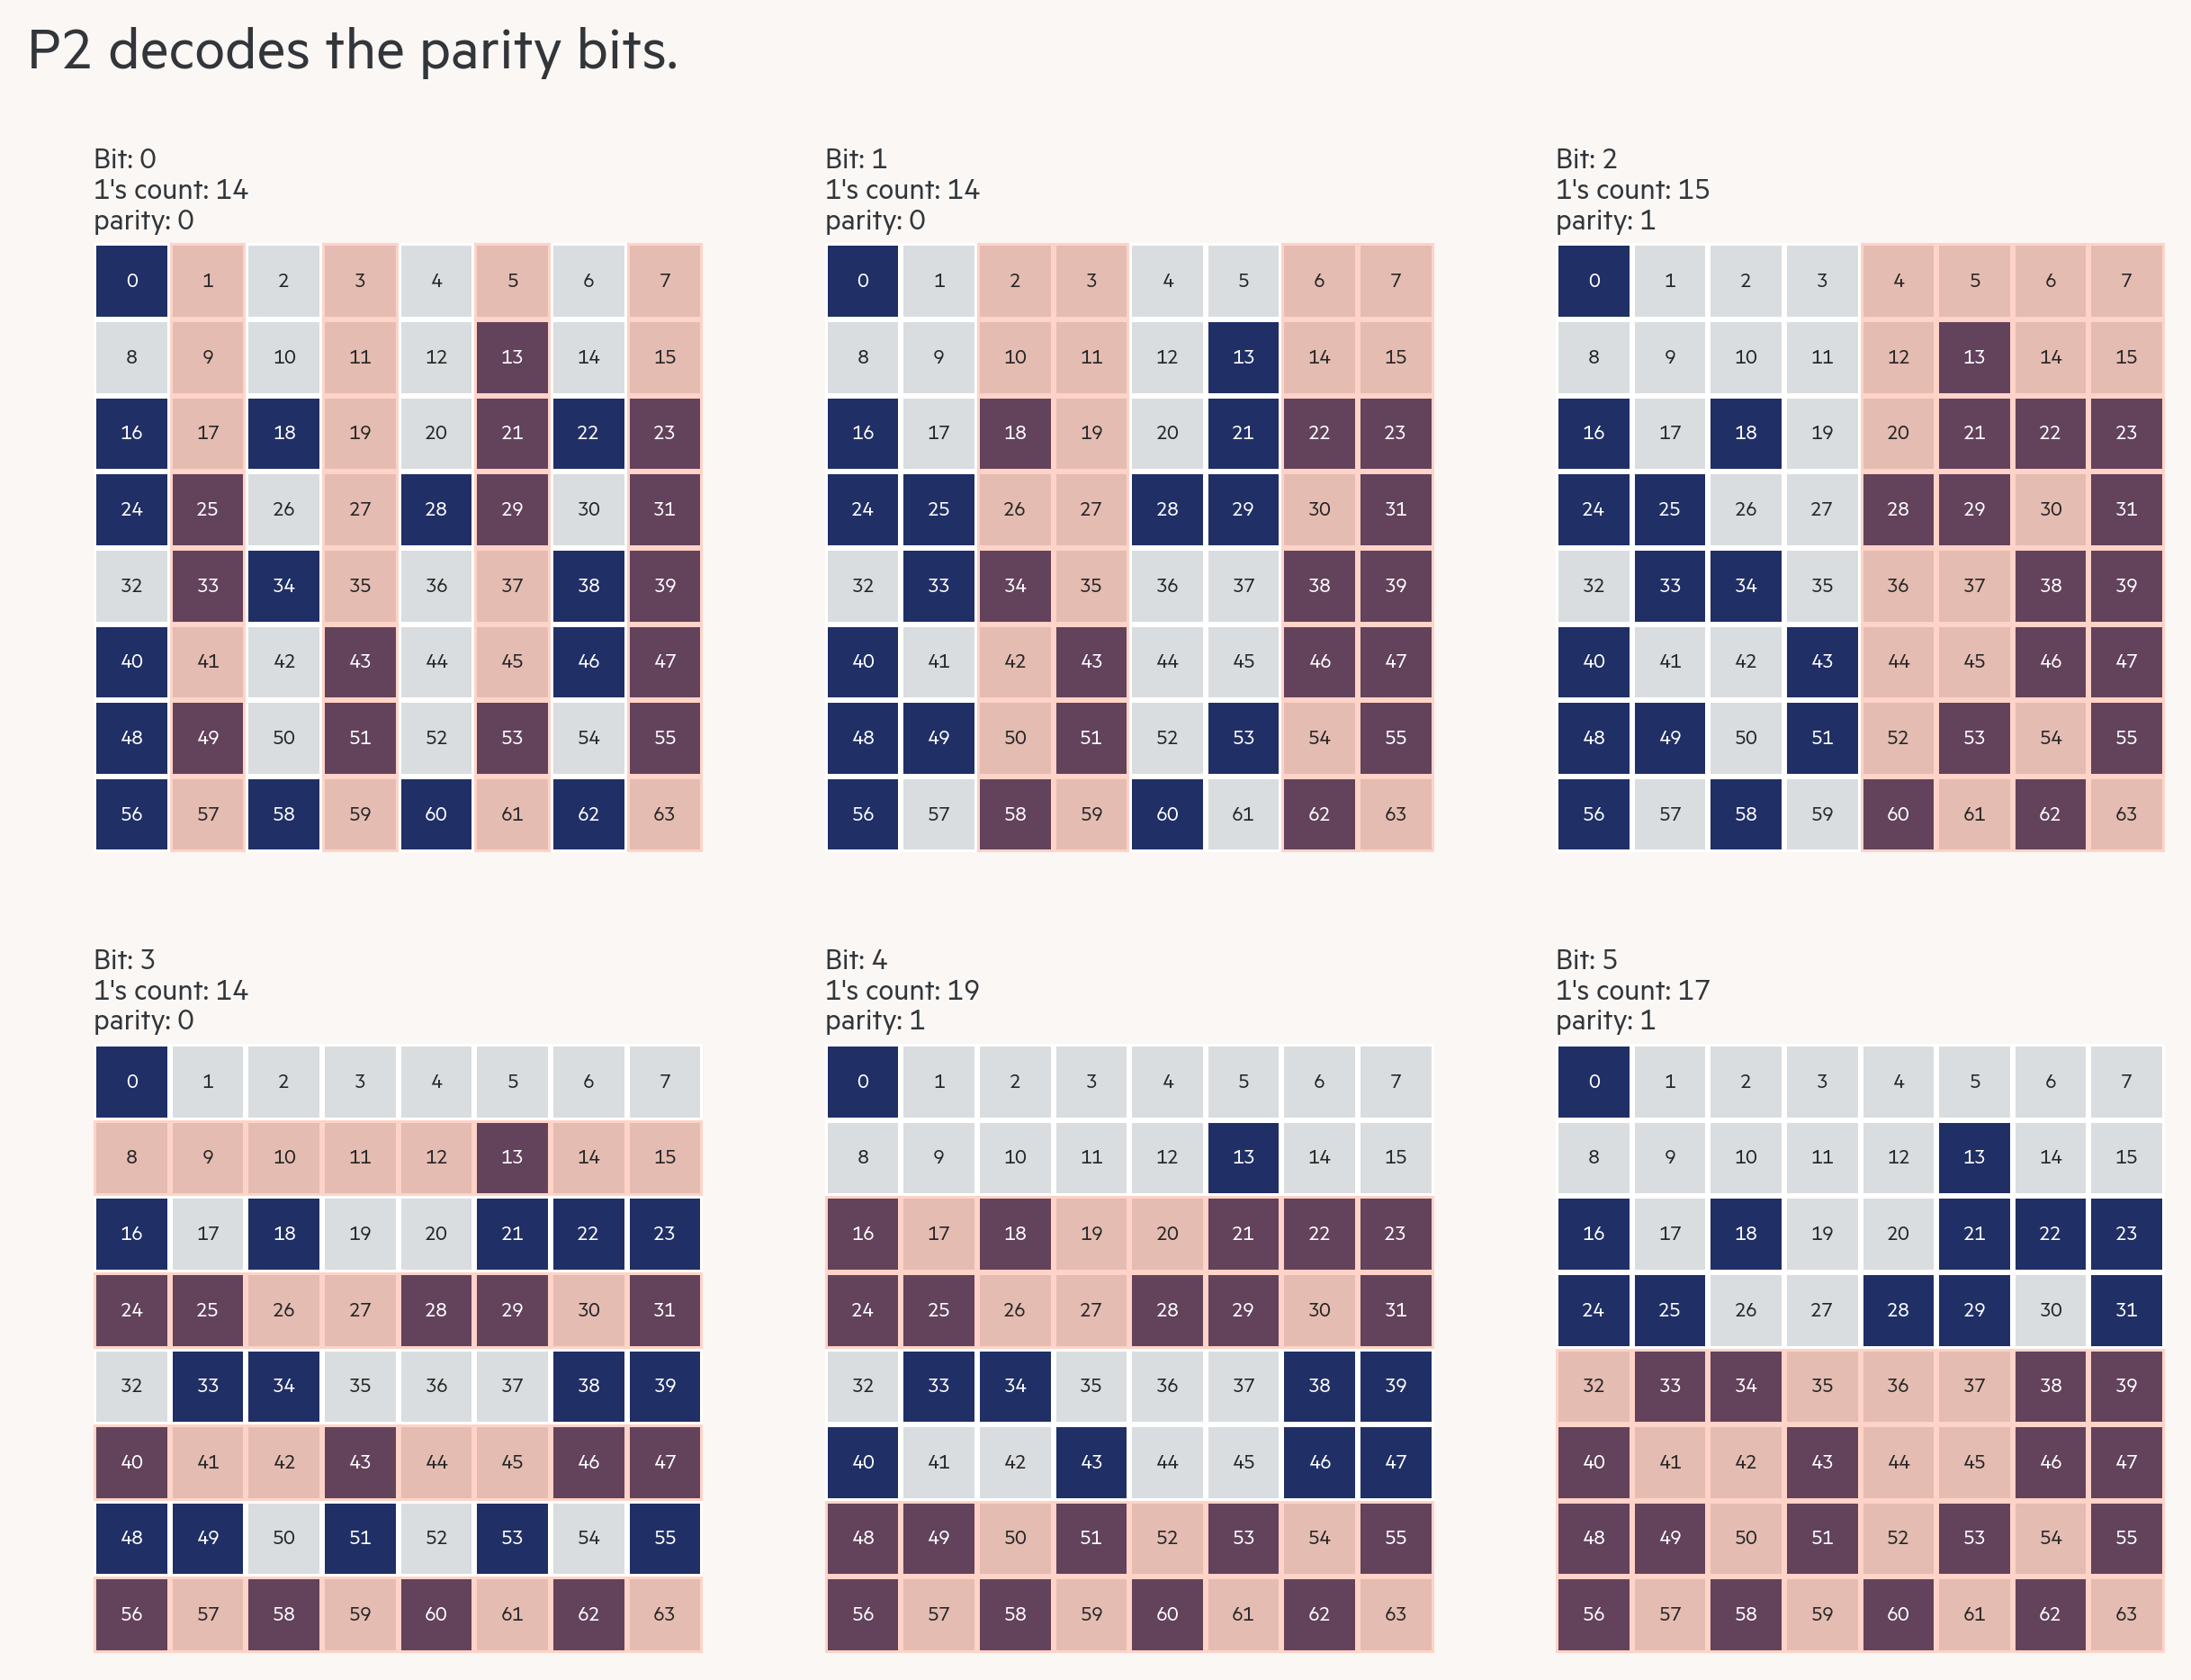

In [19]:
flipped_parity_bits = ""

ncols = n//2
nrows = int(np.ceil(n/ncols))

# dynamic fontsize based on the shape of board
# we have to config things based on height
h = n//2
fs = np.clip(h/(n*6)*72, a_min=4, a_max=12)
lw = np.clip(8/n, a_min=0.75, a_max=2)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(1.1*h*ncols, 1.2*h*nrows))

axs = np.reshape(axs, (nrows*ncols))

for i, ax in enumerate(axs):
    
    if i in bin_masking_arr.keys():
        sns.heatmap(board_flip, linewidths=lw, 
                    annot=postion_arr, annot_kws={'fontsize': fs}, fmt="d",
                    vmin=0, vmax=1, cmap=ht_cmap, square=True, cbar=False, ax=axs[i])

        sns.heatmap(bin_masking_arr[i], alpha=mask_alpha, 
                    cmap=mask_cmap, cbar=False, vmin=0, vmax=1, ax=axs[i])
    
        count_head = int(np.nansum(bin_masking_arr[i] * board_flip))
        pair = count_head % 2
        axs[i].set_title(f"Bit: {i}\n1's count: {count_head}\nparity: {pair}", fontsize=fs*(1.414**1), pad=4)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        flipped_parity_bits += str(pair)
    else:
        axs[i].set_visible(False)
        
plt.suptitle(x=0.10, y=0.95, t="P2 decodes the parity bits.", fontsize=fs*(1.414**3), ha='left', va='bottom')

plt.show()
flipped_parity_bits = flipped_parity_bits[::-1]

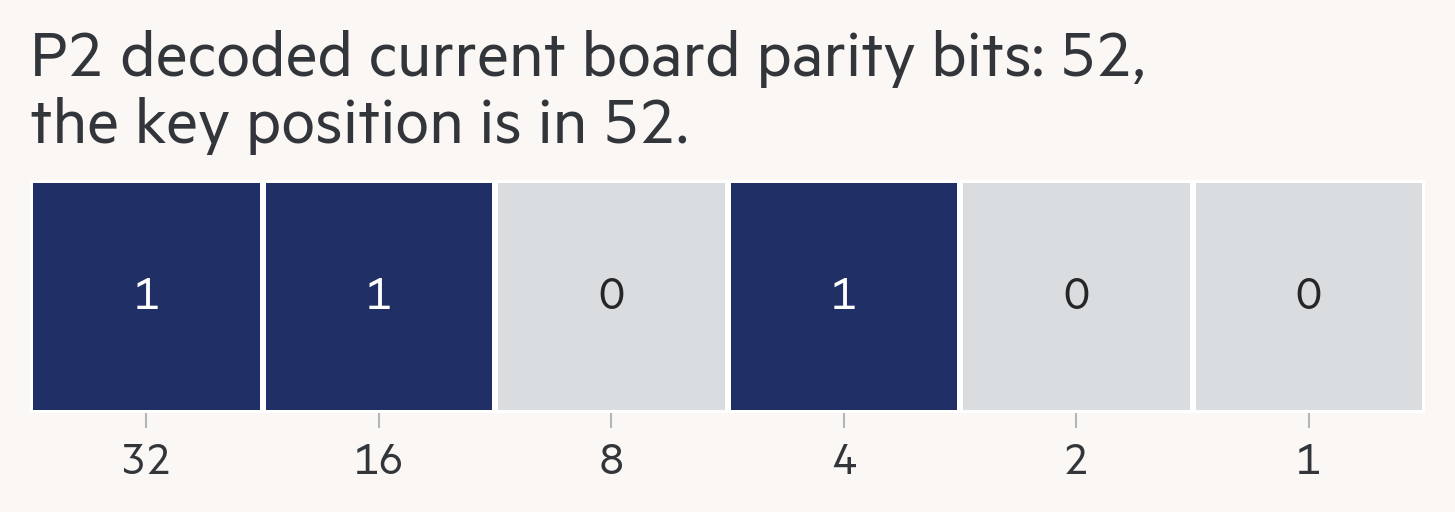

In [20]:
# dynamic fontsize based on the shape of board
# we have to config things based on height
h = np.clip(n//2, 3, 4)
fs = np.clip(h/(n*2)*72, a_min=4, a_max=12)
lw = np.clip(8/n, a_min=0.75, a_max=2)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2*h, 2*h))
axs = np.reshape(axs, (1,))


flipped_parity_bits_heatmap = np.array([list(flipped_parity_bits)], dtype=np.int)
sns.heatmap(flipped_parity_bits_heatmap, linewidths=lw, annot_kws={'fontsize': fs},
            annot=flipped_parity_bits_heatmap, fmt="d",
            vmin=0, vmax=1, cmap=ht_cmap, square=True, cbar=False, ax=axs[0])
axs[0].set_yticks([])
axs[0].set_xticklabels(2**np.arange(0, n)[::-1])
axs[0].set_title(f"P2 decoded current board parity bits: {int(flipped_parity_bits, base=2)},\nthe key position is in {key_pos}.", fontsize=fs*(1.414))

plt.show()